In [1]:
import pandas as pd
import numpy as np

from scipy import stats
from fitter import Fitter
import matplotlib.pyplot as plt


## analysis on the unfiltered data 

In [2]:
# the column names are "Export_country", "Import_country", "Month", "Year", "Nominal Value (SUM)", "Tons (SUM)"

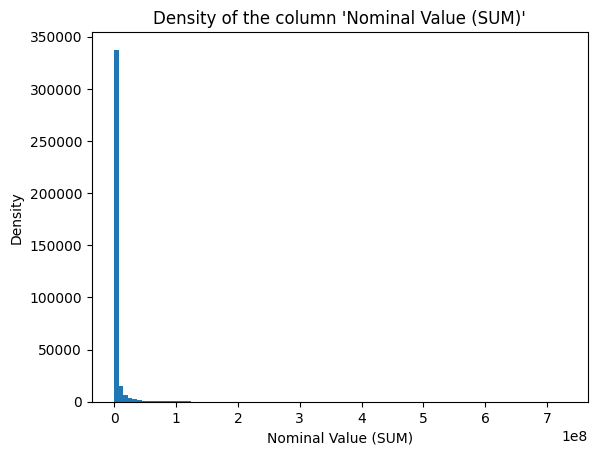

The skewness of the column 'Nominal Value (SUM)' is 10.36592910527056
The skewness of the column 'Nominal Value (SUM)' after box-cox transformation is -0.007482586913659033


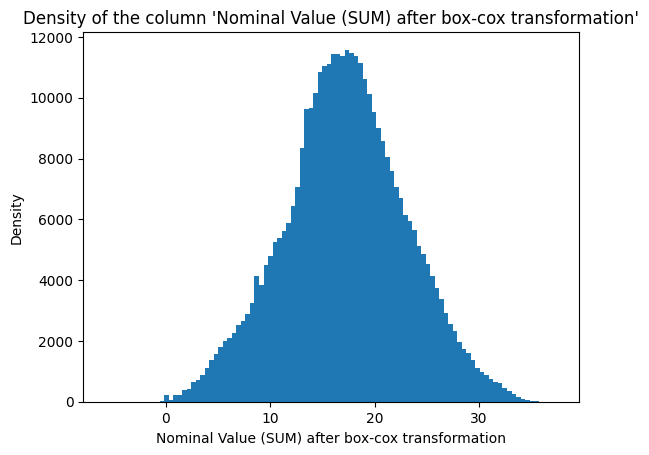

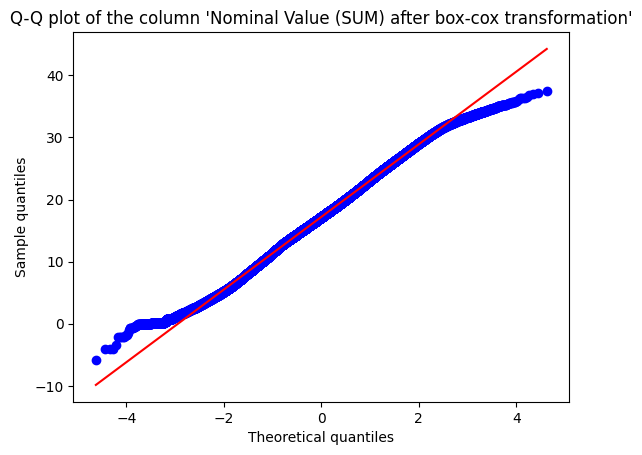

In [3]:
# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice.csv")

# plot the density of the column "Nominal Value (SUM)" in histogram
df["Nominal Value (SUM)"].plot(kind='hist', bins=100)
plt.title("Density of the column 'Nominal Value (SUM)'")
plt.xlabel("Nominal Value (SUM)")
plt.ylabel("Density")
plt.show()
print("The skewness of the column 'Nominal Value (SUM)' is", df["Nominal Value (SUM)"].skew())

# do box-cox transformation on the column "Nominal Value (SUM)" in the new column "Nominal Value (SUM) after box-cox transformation"
df["Nominal Value (SUM) after box-cox transformation"], _ = stats.boxcox(df["Nominal Value (SUM)"])
print("The skewness of the column 'Nominal Value (SUM)' after box-cox transformation is", df["Nominal Value (SUM) after box-cox transformation"].skew())

# plot the density of the column "Nominal Value (SUM) after box-cox transformation" in histogram
df["Nominal Value (SUM) after box-cox transformation"].plot(kind='hist', bins=100)
plt.title("Density of the column 'Nominal Value (SUM) after box-cox transformation'")
plt.xlabel("Nominal Value (SUM) after box-cox transformation")
plt.ylabel("Density")
plt.show()

# plot the Q-Q plot of the column "Nominal Value (SUM) after box-cox transformation"
stats.probplot(df["Nominal Value (SUM) after box-cox transformation"], dist="norm", plot=plt)
plt.title("Q-Q plot of the column 'Nominal Value (SUM) after box-cox transformation'")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()



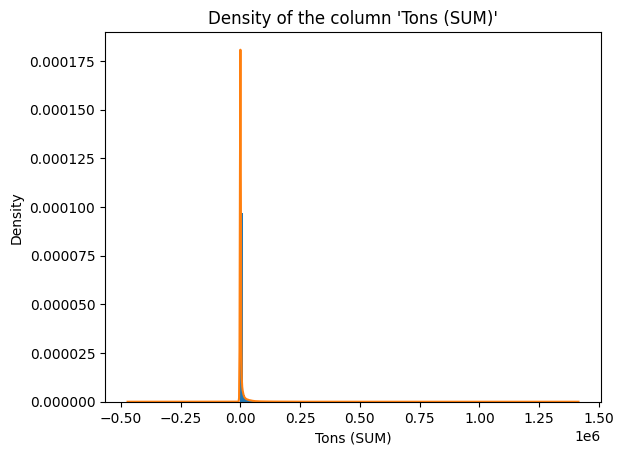

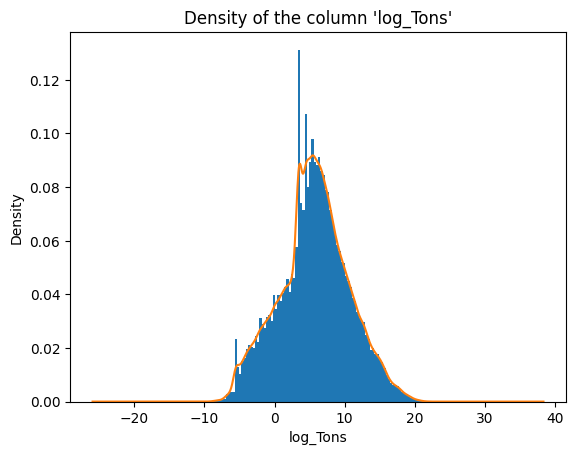

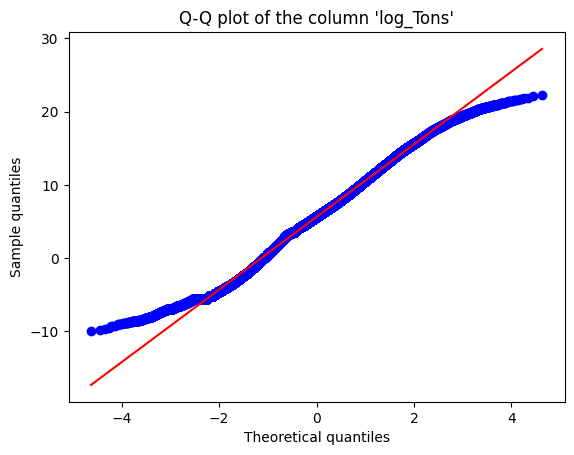

In [4]:
# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice.csv")

# plot the density of the column "Tons (SUM)" in histogram and in kernel density estimation in the same plot
df["Tons (SUM)"].plot(kind='hist', bins=100, density=True)
df["Tons (SUM)"].plot(kind='kde')
plt.title("Density of the column 'Tons (SUM)'")
plt.xlabel("Tons (SUM)")
plt.ylabel("Density")
plt.show()

# do box-cox transformation on the "Tons (SUM)" column in the new column "log_Tons"
df["log_Tons"], _ = stats.boxcox(df["Tons (SUM)"]) # where lambda is calculated as the maximum likelihood estimate

# plot the density of the column "log_Tons" in histogram and in kernel density estimation in the same plot
df["log_Tons"].plot(kind='hist', bins=100, density=True)
df["log_Tons"].plot(kind='kde')
plt.title("Density of the column 'log_Tons'")
plt.xlabel("log_Tons")
plt.ylabel("Density")
plt.show()

# plot Q-Q plot of the column "log_Tons"
stats.probplot(df["log_Tons"], dist="norm", plot=plt)
plt.title("Q-Q plot of the column 'log_Tons'")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

# # remove the outliers in the column "log_Tons"
# z = np.abs(stats.zscore(df["log_Tons"]))
# df = df[z < 3]
# # show which rows are removed
# print("The rows removed are", df[z >= 3])



The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' is 0.9836236612115884
The slope is 0.4379849433355131
The intercept is -4.26131051546697
The r_value is 0.9836236612115884
The p_value is 0.0
The std_err is 0.0003881687063424905
lambdaForNominalValue is 0.10429236335072484
lambdaForTons is 0.08367411527972357


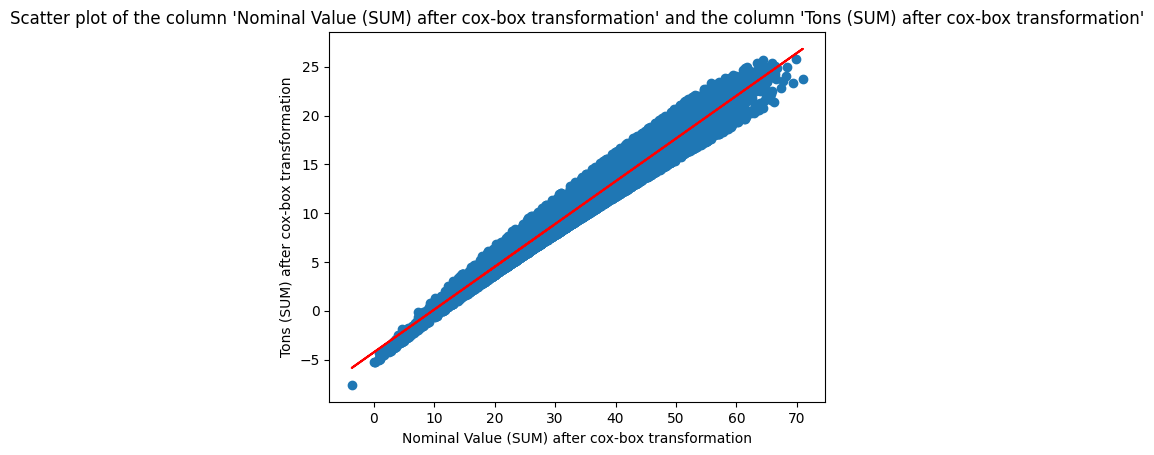

In [34]:
# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice.csv")

# filter the  "Price" column between 233 to 2341
df = df[(df["Price"] >= 233) & (df["Price"] <= 2000)]

# filter the df with "reportData\top90Countries.csv"
top90Countries = pd.read_csv("reportData/top90Countries.csv")
df = df[df["Export_country"].isin(top90Countries["Country"]) & df["Import_country"].isin(top90Countries["Country"])]

# do the cox-box transformation on the column "Nominal Value (SUM)" in the new column "Nominal Value (SUM) after cox-box transformation" and on the column "Tons (SUM)" in the new column "Tons (SUM) after cox-box transformation"
df["Nominal Value (SUM) after cox-box transformation"], lambdaForNominalValue = stats.boxcox(df["Nominal Value (SUM)"])
df["Tons (SUM) after cox-box transformation"], lambdaForTons = stats.boxcox(df["Tons (SUM)"])
# print the correlation between the column "Nominal Value (SUM) after cox-box transformation" and the column "Tons (SUM) after cox-box transformation"
print("The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' is", df["Nominal Value (SUM) after cox-box transformation"].corr(df["Tons (SUM) after cox-box transformation"]))

# do the regression analysis on the column "Nominal Value (SUM) after cox-box transformation" and the column "Tons (SUM) after cox-box transformation"
slope, intercept, r_value, p_value, std_err = stats.linregress(df["Nominal Value (SUM) after cox-box transformation"], df["Tons (SUM) after cox-box transformation"])
print("The slope is", slope)
print("The intercept is", intercept)
print("The r_value is", r_value)
print("The p_value is", p_value)
print("The std_err is", std_err)
print("lambdaForNominalValue is", lambdaForNominalValue)
print("lambdaForTons is", lambdaForTons)

# plot the scatter plot of the column "Nominal Value (SUM) after cox-box transformation" and the column "Tons (SUM) after cox-box transformation" and the regression line
plt.scatter(df["Nominal Value (SUM) after cox-box transformation"], df["Tons (SUM) after cox-box transformation"])
plt.plot(df["Nominal Value (SUM) after cox-box transformation"], slope * df["Nominal Value (SUM) after cox-box transformation"] + intercept, color='red')
plt.title("Scatter plot of the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation'")
plt.xlabel("Nominal Value (SUM) after cox-box transformation")
plt.ylabel("Tons (SUM) after cox-box transformation")
plt.show()


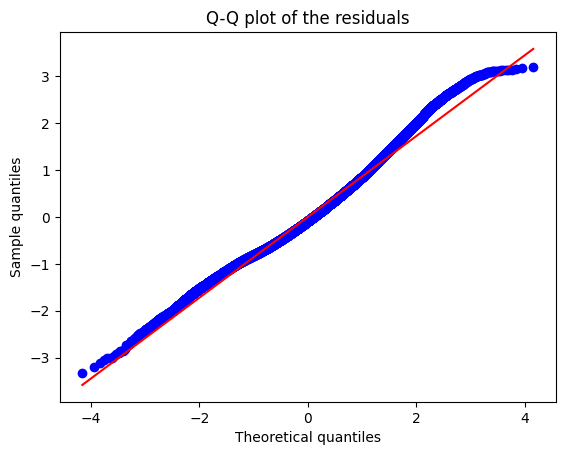

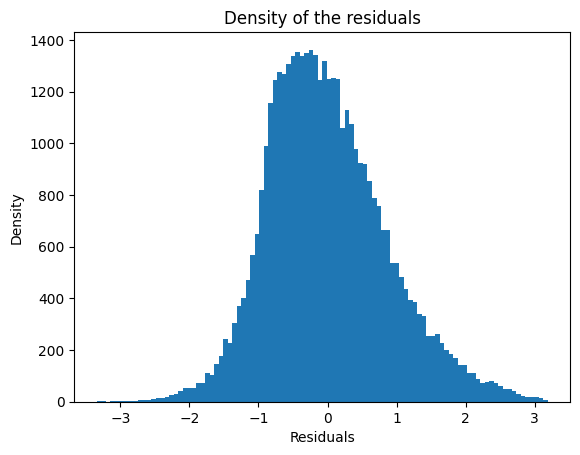

The K-S test on the residuals is KstestResult(statistic=0.01621401051961198, pvalue=3.423263434343487e-10, statistic_location=-0.955560757867417, statistic_sign=-1)


In [37]:
# test whether the residuals of the regression analysis are normally distributed
residuals = df["Tons (SUM) after cox-box transformation"] - (slope * df["Nominal Value (SUM) after cox-box transformation"] + intercept)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot of the residuals")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

# plot the density of the residuals in histogram
residuals.plot(kind='hist', bins=100)
plt.title("Density of the residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()

# do the K-S test on the residuals
paras = stats.skewnorm.fit(residuals)
print("The K-S test on the residuals is", stats.kstest(residuals, 'skewnorm', paras))

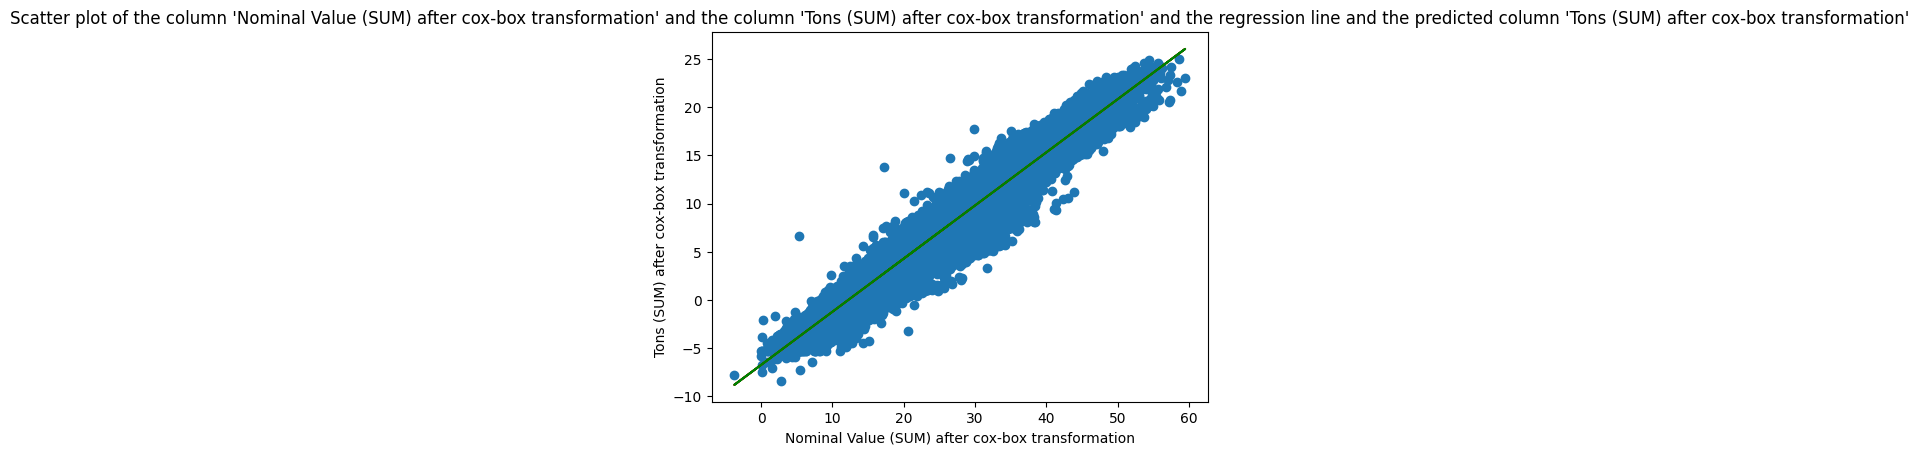

In [14]:
# use the info from the regression analysis to predict the column "Tons (SUM) after cox-box transformation" from the column "Nominal Value (SUM) after cox-box transformation"
df["Predicted Tons (SUM) after cox-box transformation"] = slope * df["Nominal Value (SUM) after cox-box transformation"] + intercept

# plot the scatter plot of the column "Nominal Value (SUM) after cox-box transformation" and the column "Tons (SUM) after cox-box transformation" and the regression line and the predicted column "Tons (SUM) after cox-box transformation"
plt.scatter(df["Nominal Value (SUM) after cox-box transformation"], df["Tons (SUM) after cox-box transformation"])
plt.plot(df["Nominal Value (SUM) after cox-box transformation"], slope * df["Nominal Value (SUM) after cox-box transformation"] + intercept, color='red')
plt.plot(df["Nominal Value (SUM) after cox-box transformation"], df["Predicted Tons (SUM) after cox-box transformation"], color='green')
plt.title("Scatter plot of the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' and the regression line and the predicted column 'Tons (SUM) after cox-box transformation'")
plt.xlabel("Nominal Value (SUM) after cox-box transformation")
plt.ylabel("Tons (SUM) after cox-box transformation")
plt.show()

## analysis on the unfiltered data grouped by year

The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' in the year 2013 is 0.9677845560128567
The slope in the year 2013 is 0.8345447996322145
The intercept in the year 2013 is -8.704625872026416
The r_value in the year 2013 is 0.9677845560128567
The p_value in the year 2013 is 0.0
The std_err in the year 2013 is 0.0011772517176785633
The lambda for the column 'Nominal Value (SUM)' in the year 2013 is 0.05515734608449182
The lambda for the column 'Tons (SUM)' in the year 2013 is 0.07016321565843482


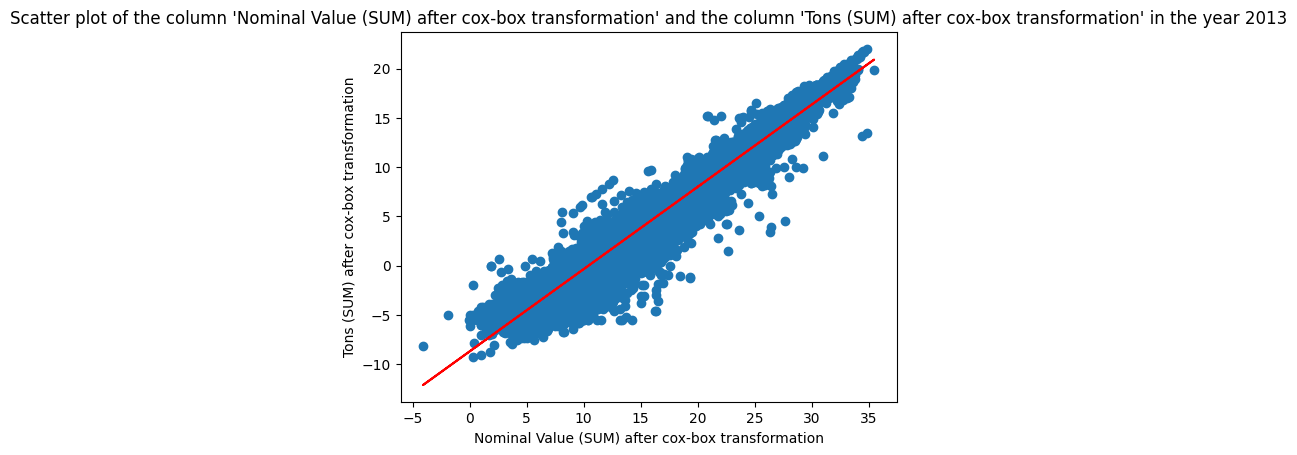

The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' in the year 2014 is 0.9677958055556398
The slope in the year 2014 is 0.8659510340296785
The intercept in the year 2014 is -8.885070575072366
The r_value in the year 2014 is 0.9677958055556396
The p_value in the year 2014 is 0.0
The std_err in the year 2014 is 0.0012158738625402902
The lambda for the column 'Nominal Value (SUM)' in the year 2014 is 0.051069368461320284
The lambda for the column 'Tons (SUM)' in the year 2014 is 0.06665908319945973


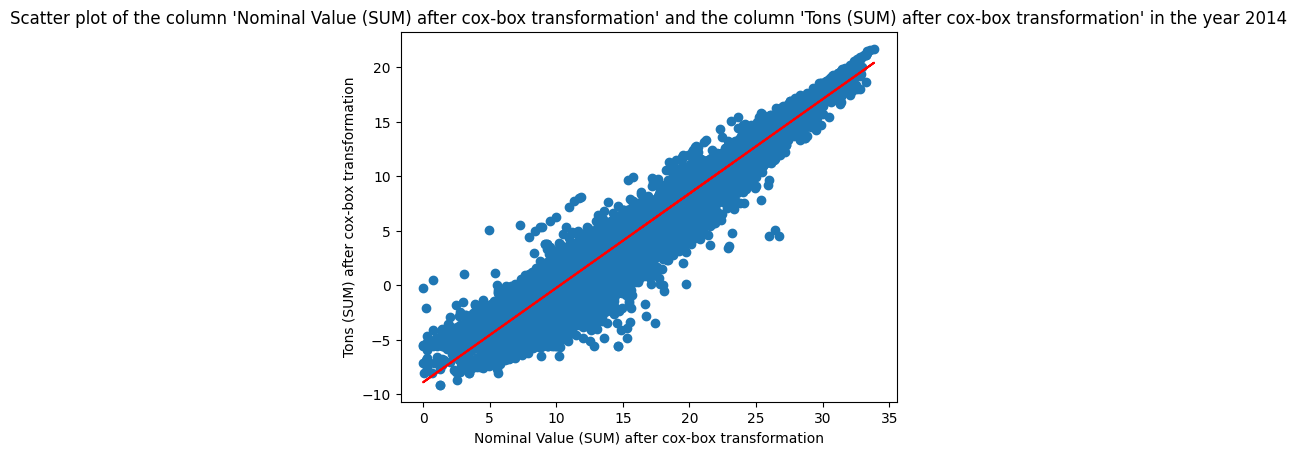

The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' in the year 2015 is 0.9644048957733148
The slope in the year 2015 is 0.8468630009936515
The intercept in the year 2015 is -8.597721441111718
The r_value in the year 2015 is 0.9644048957733148
The p_value in the year 2015 is 0.0
The std_err in the year 2015 is 0.0012467367487505468
The lambda for the column 'Nominal Value (SUM)' in the year 2015 is 0.05312362425254447
The lambda for the column 'Tons (SUM)' in the year 2015 is 0.06430022843537495


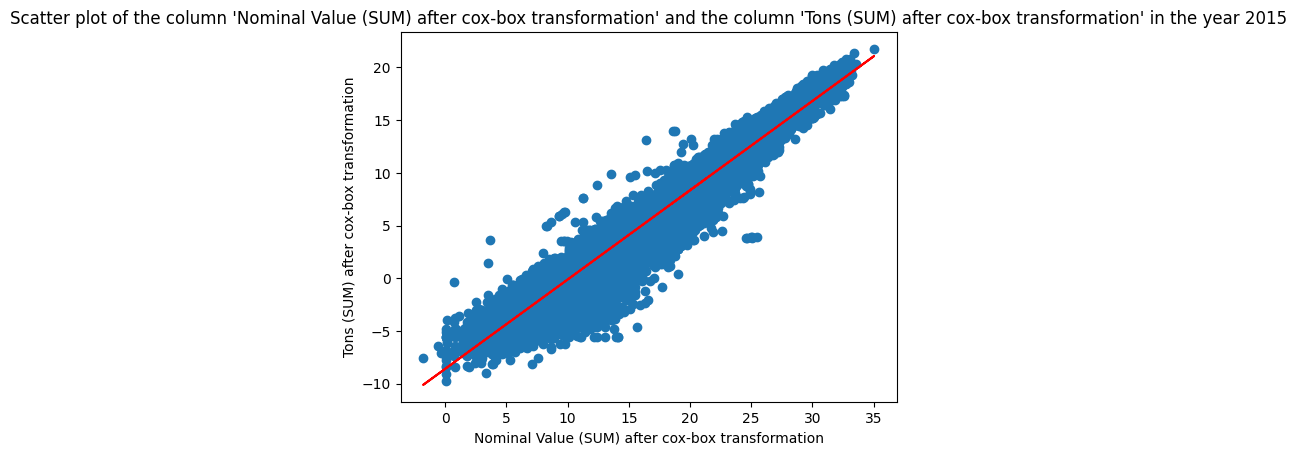

The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' in the year 2016 is 0.9629211727325455
The slope in the year 2016 is 0.8746150240079887
The intercept in the year 2016 is -8.742282437651461
The r_value in the year 2016 is 0.9629211727325457
The p_value in the year 2016 is 0.0
The std_err in the year 2016 is 0.0013139975764212227
The lambda for the column 'Nominal Value (SUM)' in the year 2016 is 0.05099284948493308
The lambda for the column 'Tons (SUM)' in the year 2016 is 0.06281443962403536


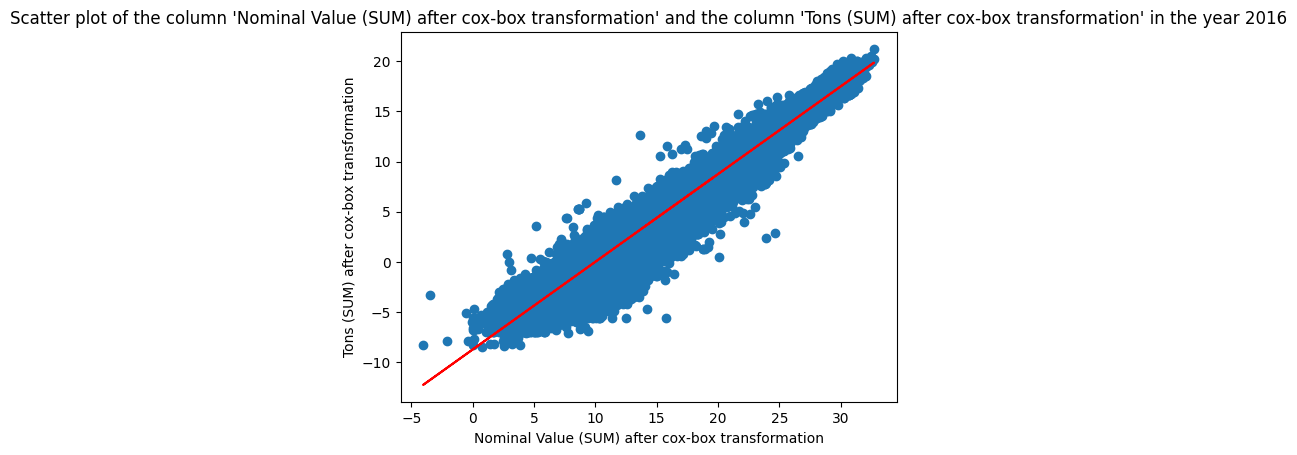

The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' in the year 2017 is 0.9670447535254467
The slope in the year 2017 is 0.8788496206543733
The intercept in the year 2017 is -8.798845859983299
The r_value in the year 2017 is 0.9670447535254468
The p_value in the year 2017 is 0.0
The std_err in the year 2017 is 0.0012295605132270492
The lambda for the column 'Nominal Value (SUM)' in the year 2017 is 0.04883099891294746
The lambda for the column 'Tons (SUM)' in the year 2017 is 0.06253919569925045


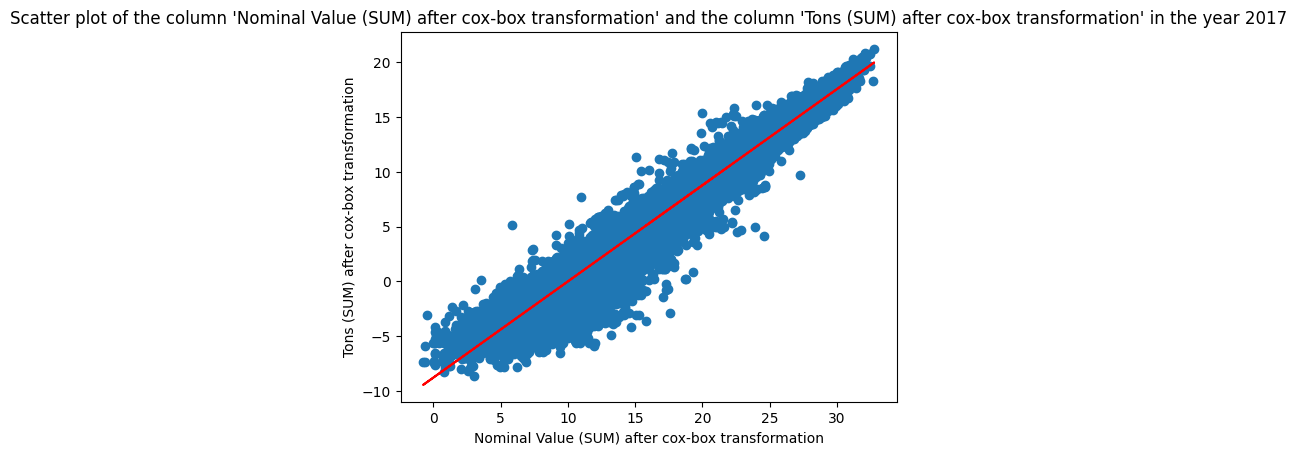

The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' in the year 2018 is 0.9681676497160597
The slope in the year 2018 is 0.8534298429823173
The intercept in the year 2018 is -8.711210814144644
The r_value in the year 2018 is 0.9681676497160596
The p_value in the year 2018 is 0.0
The std_err in the year 2018 is 0.001163032181788786
The lambda for the column 'Nominal Value (SUM)' in the year 2018 is 0.050799280917842096
The lambda for the column 'Tons (SUM)' in the year 2018 is 0.06373271934473872


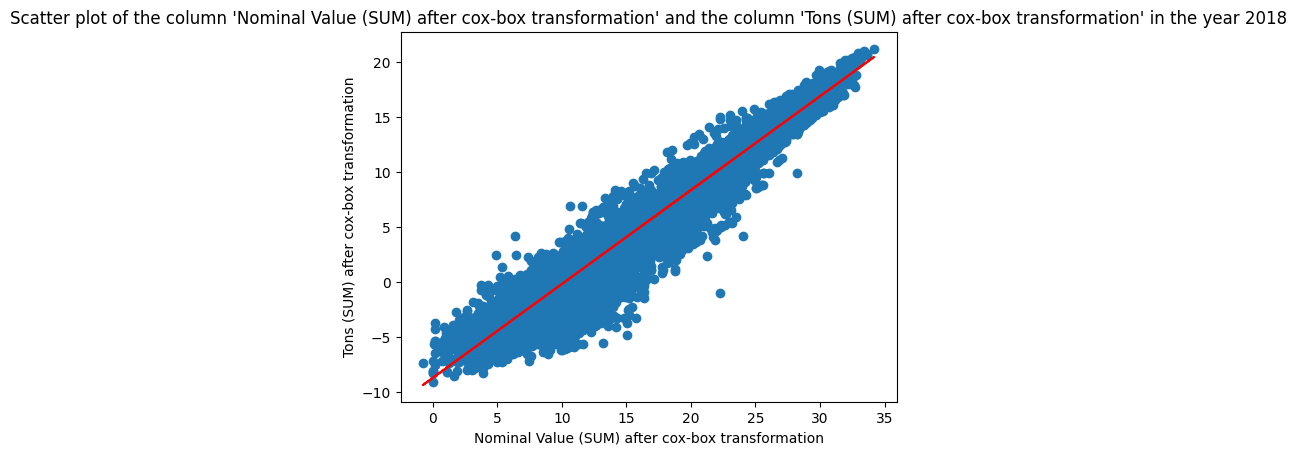

The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' in the year 2019 is 0.9667378116809494
The slope in the year 2019 is 0.8476636645783028
The intercept in the year 2019 is -8.648115937603945
The r_value in the year 2019 is 0.9667378116809496
The p_value in the year 2019 is 0.0
The std_err in the year 2019 is 0.0011879237477119694
The lambda for the column 'Nominal Value (SUM)' in the year 2019 is 0.052030538454123275
The lambda for the column 'Tons (SUM)' in the year 2019 is 0.06337801505842962


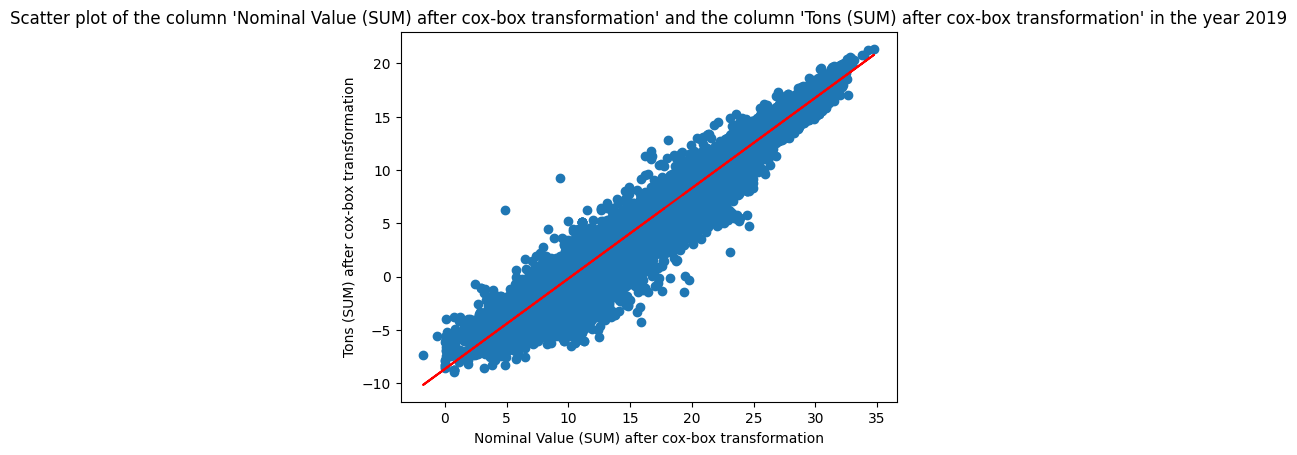

The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' in the year 2020 is 0.9666033332063261
The slope in the year 2020 is 0.8064846583997111
The intercept in the year 2020 is -8.32177348487805
The r_value in the year 2020 is 0.966603333206326
The p_value in the year 2020 is 0.0
The std_err in the year 2020 is 0.0011544267933847872
The lambda for the column 'Nominal Value (SUM)' in the year 2020 is 0.05675782260337068
The lambda for the column 'Tons (SUM)' in the year 2020 is 0.0640236688085459


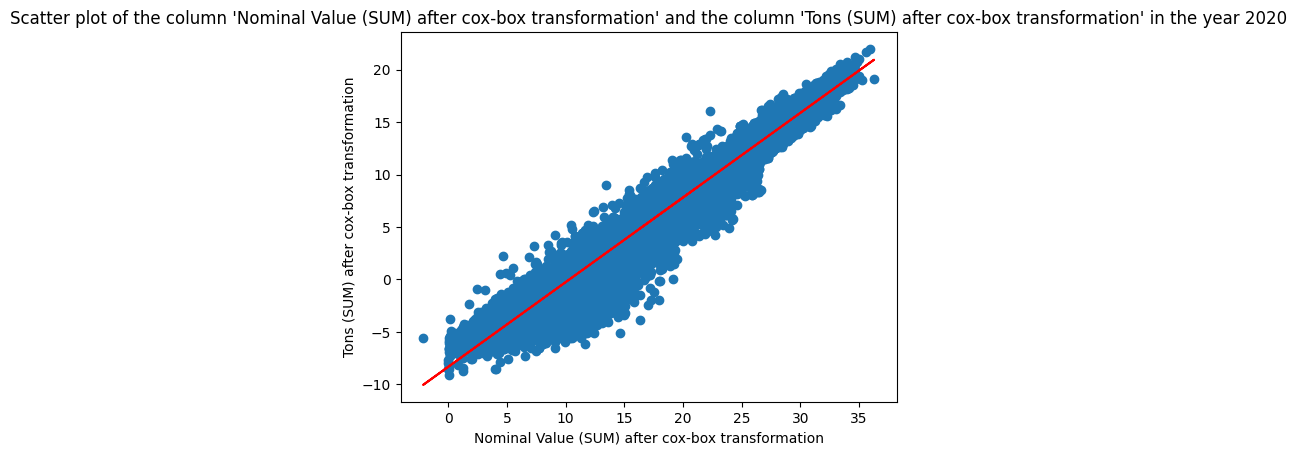

The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' in the year 2021 is 0.9711227721414799
The slope in the year 2021 is 0.7846536457290377
The intercept in the year 2021 is -8.245188785843869
The r_value in the year 2021 is 0.9711227721414798
The p_value in the year 2021 is 0.0
The std_err in the year 2021 is 0.0010294117939580313
The lambda for the column 'Nominal Value (SUM)' in the year 2021 is 0.055516290919456944
The lambda for the column 'Tons (SUM)' in the year 2021 is 0.06297239565927676


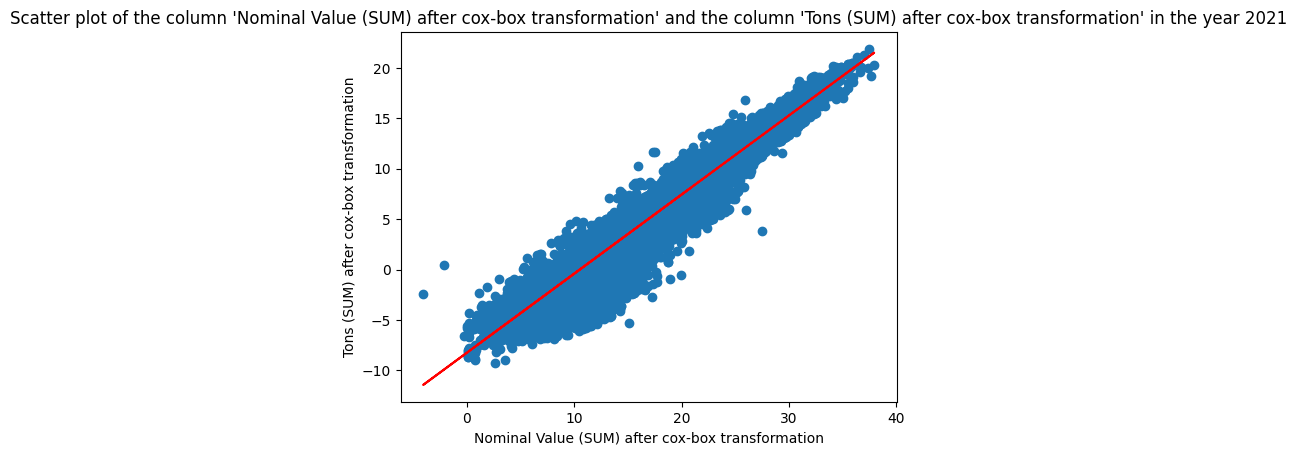

The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' in the year 2022 is 0.9693299300456708
The slope in the year 2022 is 0.7103849887449961
The intercept in the year 2022 is -7.922021012649493
The r_value in the year 2022 is 0.9693299300456708
The p_value in the year 2022 is 0.0
The std_err in the year 2022 is 0.0009835198884933917
The lambda for the column 'Nominal Value (SUM)' in the year 2022 is 0.06399099592548918
The lambda for the column 'Tons (SUM)' in the year 2022 is 0.06830307315402262


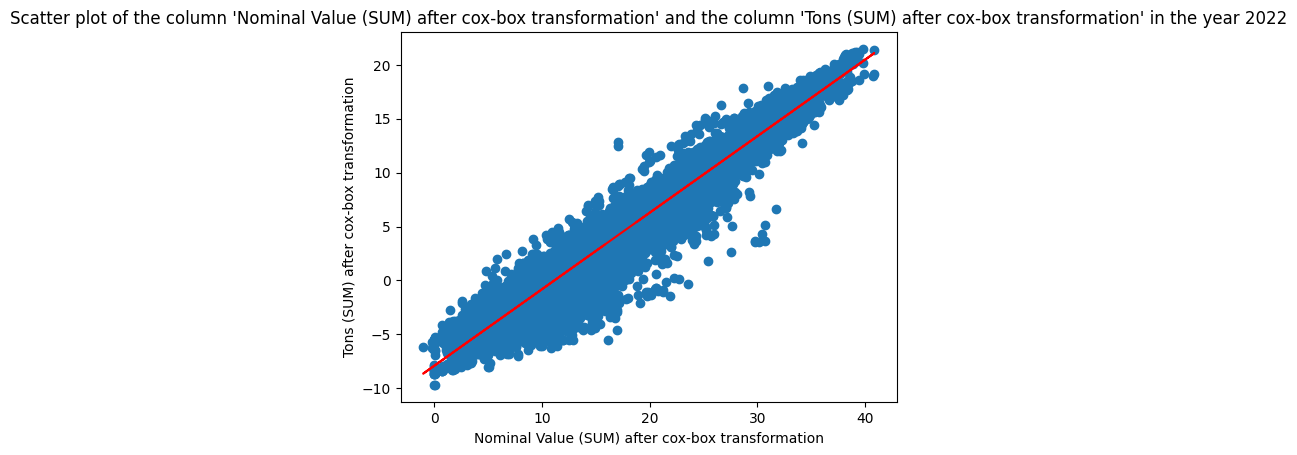

The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' in the year 2023 is 0.9654646056305419
The slope in the year 2023 is 0.7399352707831289
The intercept in the year 2023 is -8.06445499702403
The r_value in the year 2023 is 0.9654646056305418
The p_value in the year 2023 is 0.0
The std_err in the year 2023 is 0.001269341464455624
The lambda for the column 'Nominal Value (SUM)' in the year 2023 is 0.060671369496666835
The lambda for the column 'Tons (SUM)' in the year 2023 is 0.06460725461950163


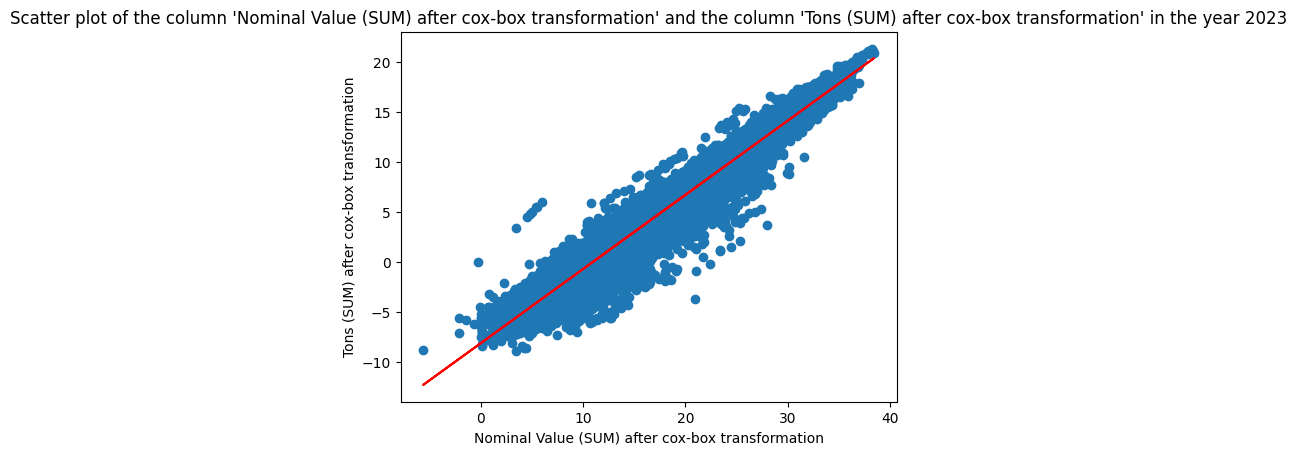

[[2013.0 0.9677845560128567 0.8345447996322145 -8.704625872026416
  0.9677845560128567 0.0 0.0011772517176785633 0.05515734608449182
  0.07016321565843482]
 [2014.0 0.9677958055556398 0.8659510340296785 -8.885070575072366
  0.9677958055556396 0.0 0.0012158738625402902 0.051069368461320284
  0.06665908319945973]
 [2015.0 0.9644048957733148 0.8468630009936515 -8.597721441111718
  0.9644048957733148 0.0 0.0012467367487505468 0.05312362425254447
  0.06430022843537495]
 [2016.0 0.9629211727325455 0.8746150240079887 -8.742282437651461
  0.9629211727325457 0.0 0.0013139975764212227 0.05099284948493308
  0.06281443962403536]
 [2017.0 0.9670447535254467 0.8788496206543733 -8.798845859983299
  0.9670447535254468 0.0 0.0012295605132270492 0.04883099891294746
  0.06253919569925045]
 [2018.0 0.9681676497160597 0.8534298429823173 -8.711210814144644
  0.9681676497160596 0.0 0.001163032181788786 0.050799280917842096
  0.06373271934473872]
 [2019.0 0.9667378116809494 0.8476636645783028 -8.6481159376039

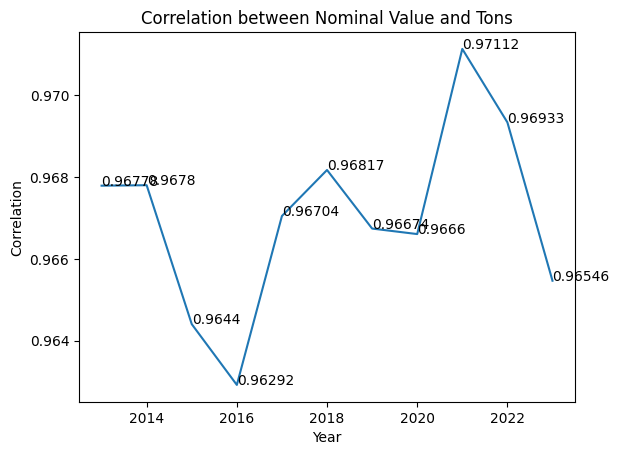

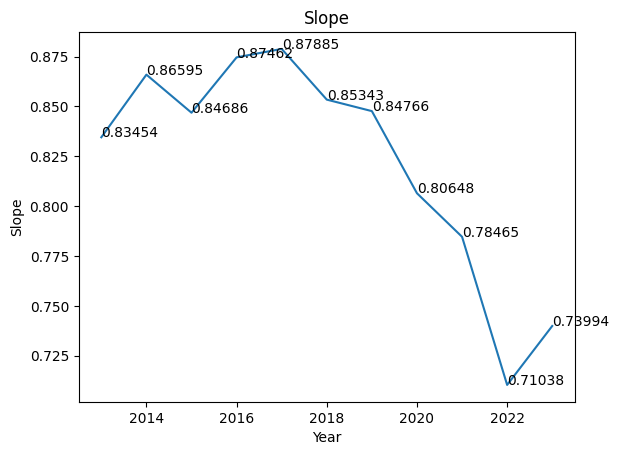

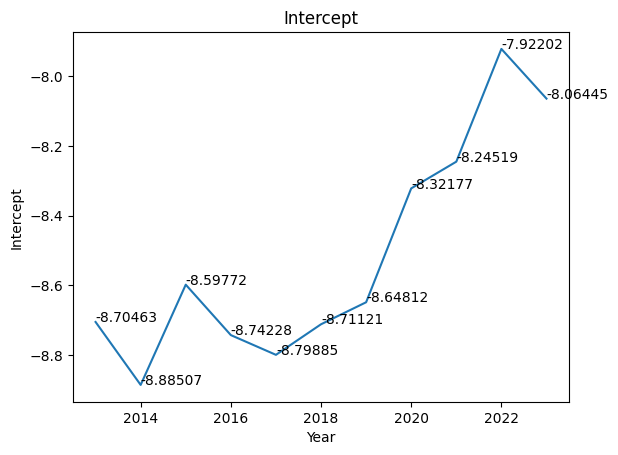

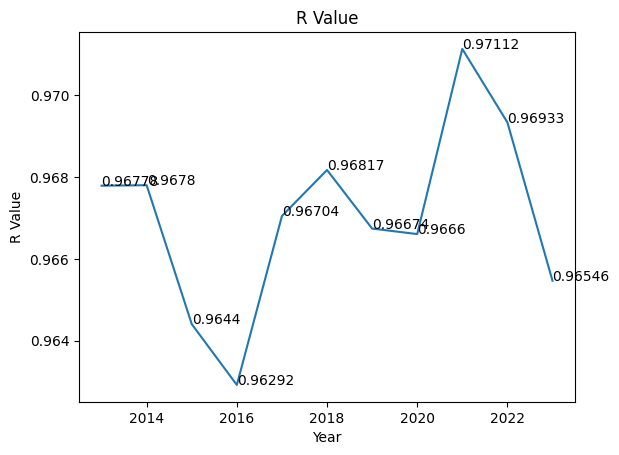

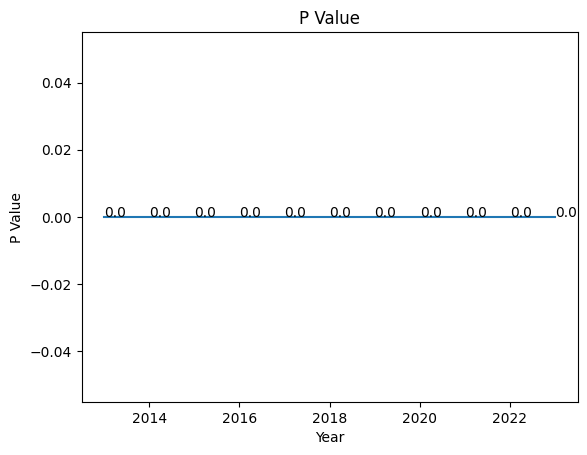

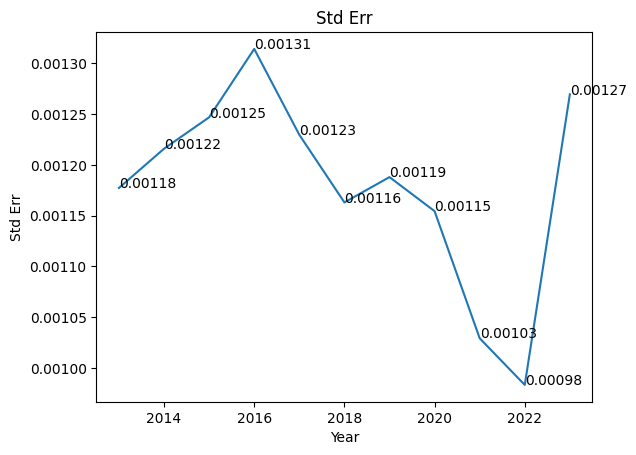

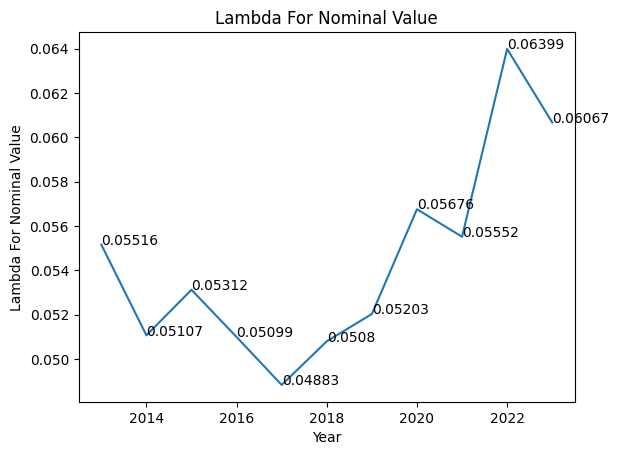

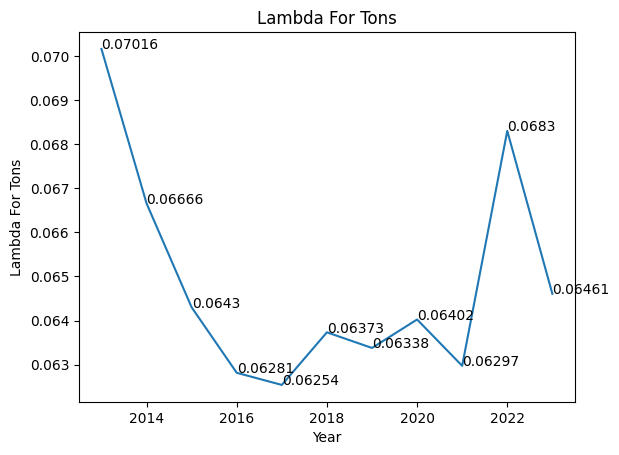

In [15]:
# load the data from the csv file
df_original = pd.read_csv("processedData\withoutZero_withPrice.csv")

# create df to store the info from the regression analysis
df_info = pd.DataFrame(columns=["Year","Correlation between Nominal Value and Tons","Slope","Intercept","R Value","P Value","Std Err","LambdaForNominalValue","LambdaForTons"])

# for 2013 to 2023 do the regression analysis
for year in range(2013, 2024):
    df = df_original.copy()
    # get the data for the year
    df_year = df[df["Year"] == year].copy()
    # do the cox-box transformation on the column "Nominal Value (SUM)" in the new column "Nominal Value (SUM) after cox-box transformation" and on the column "Tons (SUM)" in the new column "Tons (SUM) after cox-box transformation"
    df_year["Nominal Value (SUM) after cox-box transformation"], lambdaForNominalValue = stats.boxcox(df_year["Nominal Value (SUM)"])
    df_year["Tons (SUM) after cox-box transformation"], lambdaForTons = stats.boxcox(df_year["Tons (SUM)"])
    # print the correlation between the column "Nominal Value (SUM) after cox-box transformation" and the column "Tons (SUM) after cox-box transformation"
    print("The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' in the year", year, "is", df_year["Nominal Value (SUM) after cox-box transformation"].corr(df_year["Tons (SUM) after cox-box transformation"]))
    
    # do the regression analysis on the column "Nominal Value (SUM) after cox-box transformation" and the column "Tons (SUM) after cox-box transformation"
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_year["Nominal Value (SUM) after cox-box transformation"], df_year["Tons (SUM) after cox-box transformation"])
    print("The slope in the year", year, "is", slope)
    print("The intercept in the year", year, "is", intercept)
    print("The r_value in the year", year, "is", r_value)
    print("The p_value in the year", year, "is", p_value)
    print("The std_err in the year", year, "is", std_err)
    print("The lambda for the column 'Nominal Value (SUM)' in the year", year, "is", lambdaForNominalValue)
    print("The lambda for the column 'Tons (SUM)' in the year", year, "is", lambdaForTons)
    # store the info from the regression analysis
    df_info = np.concatenate((df_info, [[year, df_year["Nominal Value (SUM) after cox-box transformation"].corr(df_year["Tons (SUM) after cox-box transformation"]), slope, intercept, r_value, p_value, std_err, lambdaForNominalValue, lambdaForTons]]), axis=0)

    # plot the scatter plot of the column "Nominal Value (SUM) after cox-box transformation" and the column "Tons (SUM) after cox-box transformation" and the regression line
    plt.scatter(df_year["Nominal Value (SUM) after cox-box transformation"], df_year["Tons (SUM) after cox-box transformation"])
    plt.plot(df_year["Nominal Value (SUM) after cox-box transformation"], slope * df_year["Nominal Value (SUM) after cox-box transformation"] + intercept, color='red')
    plt.title("Scatter plot of the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' in the year " + str(year))
    plt.xlabel("Nominal Value (SUM) after cox-box transformation")
    plt.ylabel("Tons (SUM) after cox-box transformation")
    plt.show()

# print the info from the regression analysis
print(df_info)

# plot the slope, intercept, r value, p value, and std err in the years 2013 to 2023 in different plots
plt.plot(df_info[:,0], df_info[:,1])
# mark the data points 
for i in range(len(df_info)):
    # set the data to 5 decimal places
    plt.text(df_info[i,0], df_info[i,1], str(round(df_info[i,1],5)))
plt.title("Correlation between Nominal Value and Tons")
plt.xlabel("Year")
plt.ylabel("Correlation")
plt.show()

plt.plot(df_info[:,0], df_info[:,2])
# mark the data points 
for i in range(len(df_info)):
    # set the data to 5 decimal places
    plt.text(df_info[i,0], df_info[i,2], str(round(df_info[i,2],5)))
plt.title("Slope")
plt.xlabel("Year")
plt.ylabel("Slope")
plt.show()

plt.plot(df_info[:,0], df_info[:,3])
# mark the data points
for i in range(len(df_info)):
    # set the data to 5 decimal places
    plt.text(df_info[i,0], df_info[i,3], str(round(df_info[i,3],5)))
plt.title("Intercept")
plt.xlabel("Year")
plt.ylabel("Intercept")
plt.show()

plt.plot(df_info[:,0], df_info[:,4])
# mark the data points
for i in range(len(df_info)):
    # set the data to 5 decimal places
    plt.text(df_info[i,0], df_info[i,4], str(round(df_info[i,4],5)))
plt.title("R Value")
plt.xlabel("Year")
plt.ylabel("R Value")
plt.show()

plt.plot(df_info[:,0], df_info[:,5])
# mark the data points
for i in range(len(df_info)):
    # set the data to 5 decimal places
    plt.text(df_info[i,0], df_info[i,5], str(round(df_info[i,5],5)))
plt.title("P Value")
plt.xlabel("Year")
plt.ylabel("P Value")
plt.show()

plt.plot(df_info[:,0], df_info[:,6])
# mark the data points
for i in range(len(df_info)):
    # set the data to 5 decimal places
    plt.text(df_info[i,0], df_info[i,6], str(round(df_info[i,6],5)))
plt.title("Std Err")
plt.xlabel("Year")
plt.ylabel("Std Err")
plt.show()

plt.plot(df_info[:,0], df_info[:,7])
# mark the data points
for i in range(len(df_info)):
    # set the data to 5 decimal places
    plt.text(df_info[i,0], df_info[i,7], str(round(df_info[i,7],5)))
plt.title("Lambda For Nominal Value")
plt.xlabel("Year")
plt.ylabel("Lambda For Nominal Value")
plt.show()

plt.plot(df_info[:,0], df_info[:,8])
# mark the data points
for i in range(len(df_info)):
    # set the data to 5 decimal places
    plt.text(df_info[i,0], df_info[i,8], str(round(df_info[i,8],5)))
plt.title("Lambda For Tons")
plt.xlabel("Year")
plt.ylabel("Lambda For Tons")
plt.show()




## analysis on the unfiltered annually data 

The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' is 0.9942549568788869
The slope is 0.7159538868065882
The intercept is -5.719037999557476
The r_value is 0.9942549568788869
The p_value is 0.0
The std_err is 0.000409751742955932


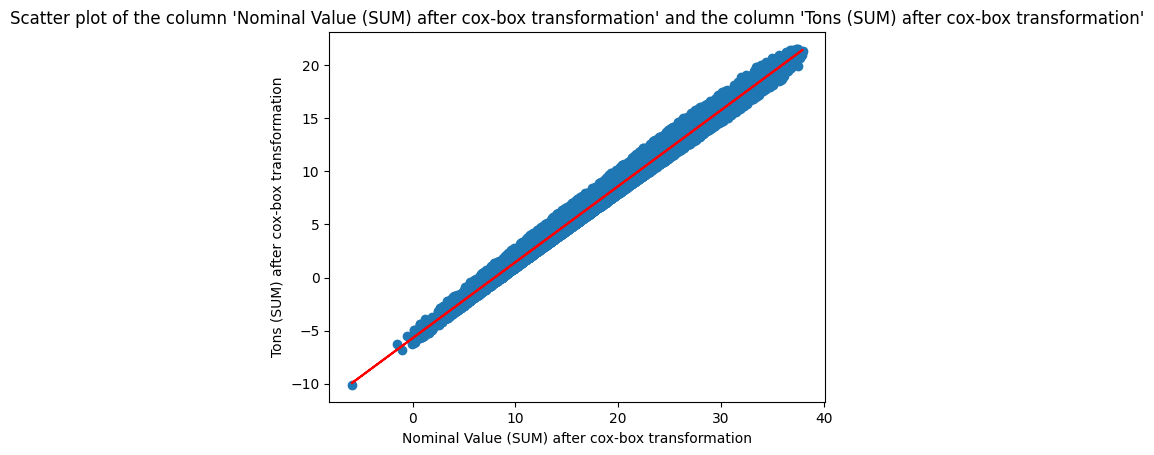

In [16]:
# load the data from the csv file
df = pd.read_csv("processedData/anually.csv")

# do the cox-box transformation on the column "Nominal Value (SUM)" in the new column "Nominal Value (SUM) after cox-box transformation" and on the column "Tons (SUM)" in the new column "Tons (SUM) after cox-box transformation"
df["Nominal Value (SUM) after cox-box transformation"], lambdaForNominalValue = stats.boxcox(df["Nominal Value (SUM)"])
df["Tons (SUM) after cox-box transformation"], lambdaForTons = stats.boxcox(df["Tons (SUM)"])
# print the correlation between the column "Nominal Value (SUM) after cox-box transformation" and the column "Tons (SUM) after cox-box transformation"
print("The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation' is", df["Nominal Value (SUM) after cox-box transformation"].corr(df["Tons (SUM) after cox-box transformation"]))

# do the regression analysis on the column "Nominal Value (SUM) after cox-box transformation" and the column "Tons (SUM) after cox-box transformation"
slope, intercept, r_value, p_value, std_err = stats.linregress(df["Nominal Value (SUM) after cox-box transformation"], df["Tons (SUM) after cox-box transformation"])
print("The slope is", slope)
print("The intercept is", intercept)
print("The r_value is", r_value)
print("The p_value is", p_value)
print("The std_err is", std_err)

# plot the scatter plot of the column "Nominal Value (SUM) after cox-box transformation" and the column "Tons (SUM) after cox-box transformation" and the regression line
plt.scatter(df["Nominal Value (SUM) after cox-box transformation"], df["Tons (SUM) after cox-box transformation"])
plt.plot(df["Nominal Value (SUM) after cox-box transformation"], slope * df["Nominal Value (SUM) after cox-box transformation"] + intercept, color='red')
plt.title("Scatter plot of the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Tons (SUM) after cox-box transformation'")
plt.xlabel("Nominal Value (SUM) after cox-box transformation")
plt.ylabel("Tons (SUM) after cox-box transformation")
plt.show()

## directly regression on price and tons

The correlation between the column 'Tons (SUM) after cox-box transformation' and the column 'Price after cox-box transformation' is -0.6450572540251527


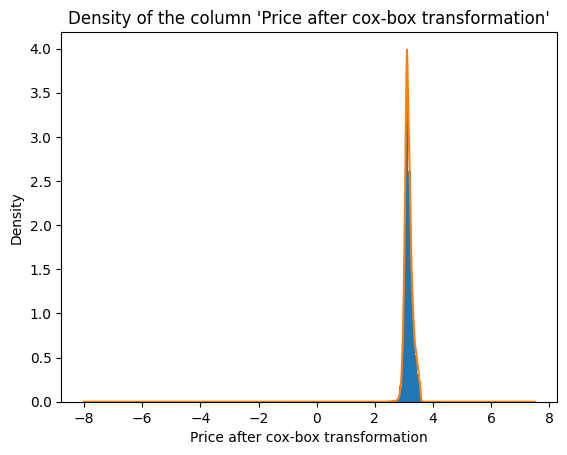

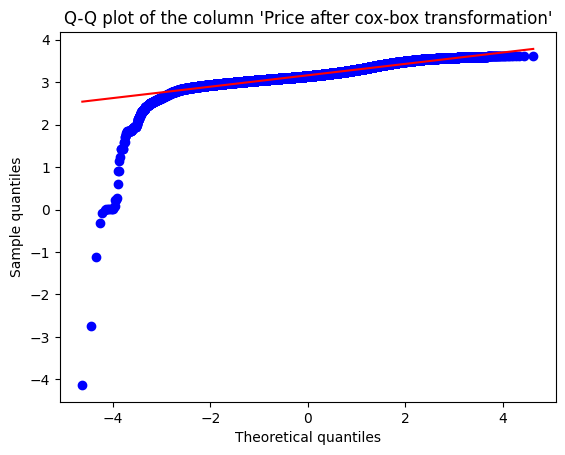

The slope is -0.0180190743418189
The intercept is 3.2625249950839272
The r_value is -0.6450572540251526
The p_value is 0.0
The std_err is 3.4972833993705927e-05


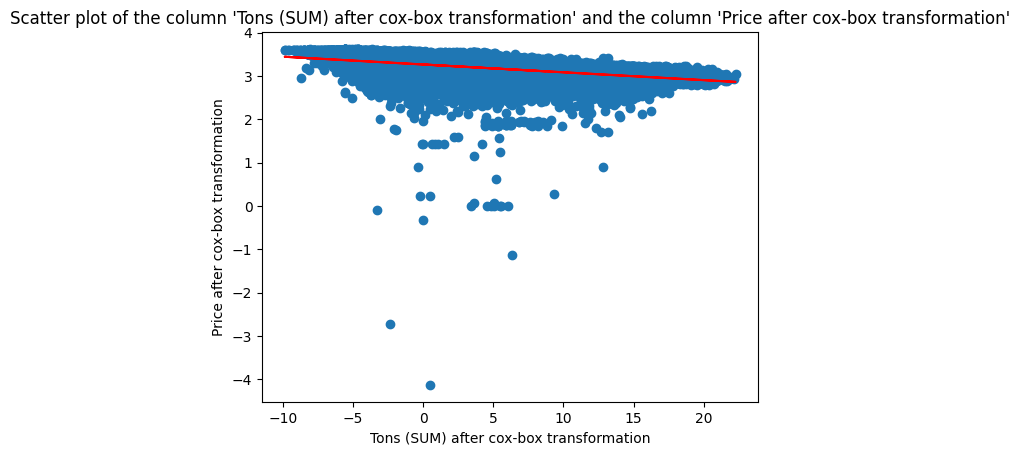

The rows removed are           Export_country        Import_country  Month  Year  \
522              Belgium                 Gabon      1  2013   
663          Switzerland           New Zealand      1  2013   
689          Switzerland  United Arab Emirates      1  2013   
807              Denmark             Singapore      1  2013   
1040    China (mainland)                 Libya      1  2013   
...                  ...                   ...    ...   ...   
371414           Iceland        United Kingdom      9  2023   
372000     United States                Norway      9  2023   
372178        Bangladesh             Singapore     10  2023   
372348          Cameroon      China (mainland)     10  2023   
372445       South Korea                Serbia     10  2023   

        Nominal Value (SUM)  Tons (SUM)         Price  \
522            14974.982422   100.50000  1.490048e+02   
663               29.239767     0.00001  2.923977e+06   
689             2347.844898     0.00091  2.580049e+

KeyboardInterrupt: 

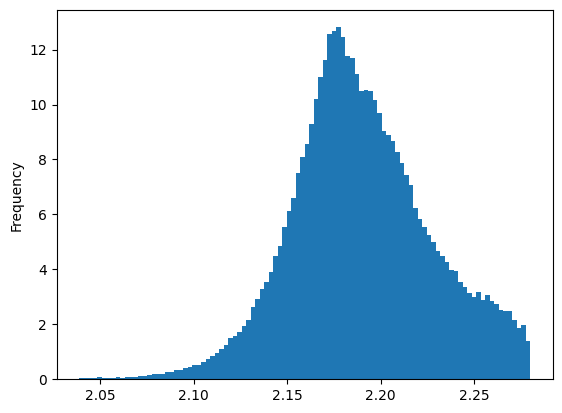

In [17]:
# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice.csv")

# do the cox-box transformation on the column "Tons (SUM)" in the new column "Tons (SUM) after cox-box transformation" and on the column "Price" in the new column "Price after cox-box transformation"
df["Tons (SUM) after cox-box transformation"], lambdaForTons = stats.boxcox(df["Tons (SUM)"])
df["Price after cox-box transformation"], lambdaForPrice = stats.boxcox(df["Price"])
# print the correlation between the column "Tons (SUM) after cox-box transformation" and the column "Price after cox-box transformation"
print("The correlation between the column 'Tons (SUM) after cox-box transformation' and the column 'Price after cox-box transformation' is", df["Tons (SUM) after cox-box transformation"].corr(df["Price after cox-box transformation"]))

# plot the density of the column "Price after cox-box transformation" in histogram and in kernel density estimation in the same plot
df["Price after cox-box transformation"].plot(kind='hist', bins=100, density=True)
df["Price after cox-box transformation"].plot(kind='kde')
plt.title("Density of the column 'Price after cox-box transformation'")
plt.xlabel("Price after cox-box transformation")
plt.ylabel("Density")
plt.show()

# plot the Q-Q plot of the column "Price after cox-box transformation"
stats.probplot(df["Price after cox-box transformation"], dist="norm", plot=plt)
plt.title("Q-Q plot of the column 'Price after cox-box transformation'")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

# do the regression analysis on the column "Tons (SUM) after cox-box transformation" and the column "Price after cox-box transformation"
slope, intercept, r_value, p_value, std_err = stats.linregress(df["Tons (SUM) after cox-box transformation"], df["Price after cox-box transformation"])
print("The slope is", slope)
print("The intercept is", intercept)
print("The r_value is", r_value)
print("The p_value is", p_value)
print("The std_err is", std_err)

# plot the scatter plot of the column "Tons (SUM) after cox-box transformation" and the column "Price after cox-box transformation" and the regression line
plt.scatter(df["Tons (SUM) after cox-box transformation"], df["Price after cox-box transformation"])
plt.plot(df["Tons (SUM) after cox-box transformation"], slope * df["Tons (SUM) after cox-box transformation"] + intercept, color='red')
plt.title("Scatter plot of the column 'Tons (SUM) after cox-box transformation' and the column 'Price after cox-box transformation'")
plt.xlabel("Tons (SUM) after cox-box transformation")
plt.ylabel("Price after cox-box transformation")
plt.show()

# remove the outliers in the column "Price after cox-box transformation"
z = np.abs(stats.zscore(df["Price after cox-box transformation"]))
# show which rows are removed
print("The rows removed are", df[z >= 3])
df = df[z < 3].reset_index(drop=True) # remove the outliers and reset the index

# do the cox-box transformation on the column "Tons (SUM)" in the new column "Tons (SUM) after cox-box transformation without outliers" and on the column "Price" in the new column "Price after cox-box transformation without outliers"
df["Tons (SUM) after cox-box transformation without outliers"], lambdaForTons = stats.boxcox(df["Tons (SUM)"])
df["Price after cox-box transformation without outliers"], lambdaForPrice = stats.boxcox(df["Price"])
# print the correlation between the column "Tons (SUM) after cox-box transformation without outliers" and the column "Price after cox-box transformation without outliers"
print("The correlation between the column 'Tons (SUM) after cox-box transformation without outliers' and the column 'Price after cox-box transformation without outliers' is", df["Tons (SUM) after cox-box transformation without outliers"].corr(df["Price after cox-box transformation without outliers"]))

# plot the density of the column "Price after cox-box transformation without outliers" in histogram and in kernel density estimation in the same plot
df["Price after cox-box transformation without outliers"].plot(kind='hist', bins=100, density=True)
df["Price after cox-box transformation without outliers"].plot(kind='kde')
plt.title("Density of the column 'Price after cox-box transformation without outliers'")
plt.xlabel("Price after cox-box transformation without outliers")
plt.ylabel("Density")
plt.show()

# do the regression analysis on the column "Tons (SUM) after cox-box transformation without outliers" and the column "Price after cox-box transformation without outliers"
slope, intercept, r_value, p_value, std_err = stats.linregress(df["Tons (SUM) after cox-box transformation without outliers"], df["Price after cox-box transformation without outliers"],alternative='less')
print("The slope is", slope)
print("The intercept is", intercept)
print("The r_value is", r_value)
print("The p_value is", p_value)
print("The std_err is", std_err)

# plot the scatter plot of the column "Tons (SUM) after cox-box transformation without outliers" and the column "Price after cox-box transformation without outliers" and the regression line
plt.scatter(df["Tons (SUM) after cox-box transformation without outliers"], df["Price after cox-box transformation without outliers"])
plt.plot(df["Tons (SUM) after cox-box transformation without outliers"], slope * df["Tons (SUM) after cox-box transformation without outliers"] + intercept, color='red')
plt.title("Scatter plot of the column 'Tons (SUM) after cox-box transformation without outliers' and the column 'Price after cox-box transformation without outliers'")
plt.xlabel("Tons (SUM) after cox-box transformation without outliers")
plt.ylabel("Price after cox-box transformation without outliers")
plt.show()


## directly regression on price and value

The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Price after cox-box transformation' is -0.4396129206643169
The slope is -0.010428389664335716
The intercept is 3.340464923467765
The r_value is -0.4396129206643169
The p_value is 0.0
The std_err is 3.4909262862865786e-05


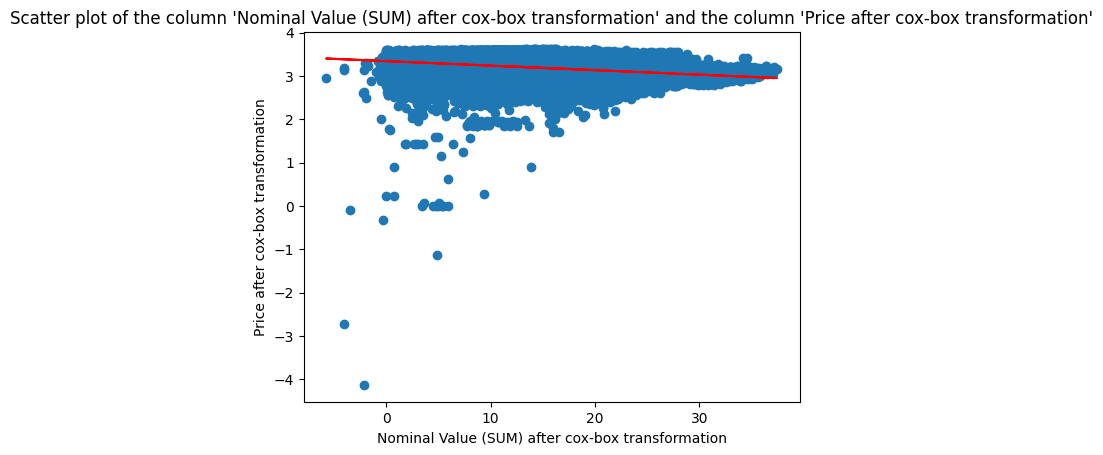

In [ ]:
# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice.csv")

# do the cox-box transformation on the column "Nominal Value (SUM)" in the new column "Nominal Value (SUM) after cox-box transformation" and on the column "Price" in the new column "Price after cox-box transformation"
df["Nominal Value (SUM) after cox-box transformation"], lambdaForNominalValue = stats.boxcox(df["Nominal Value (SUM)"])
df["Price after cox-box transformation"], lambdaForPrice = stats.boxcox(df["Price"])
# print the correlation between the column "Nominal Value (SUM) after cox-box transformation" and the column "Price after cox-box transformation"
print("The correlation between the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Price after cox-box transformation' is", df["Nominal Value (SUM) after cox-box transformation"].corr(df["Price after cox-box transformation"]))
# do the regression analysis on the column "Nominal Value (SUM) after cox-box transformation" and the column "Price after cox-box transformation"
slope, intercept, r_value, p_value, std_err = stats.linregress(df["Nominal Value (SUM) after cox-box transformation"], df["Price after cox-box transformation"])
print("The slope is", slope)
print("The intercept is", intercept)
print("The r_value is", r_value)
print("The p_value is", p_value)
print("The std_err is", std_err)

# plot the scatter plot of the column "Nominal Value (SUM) after cox-box transformation" and the column "Price after cox-box transformation" and the regression line
plt.scatter(df["Nominal Value (SUM) after cox-box transformation"], df["Price after cox-box transformation"])
plt.plot(df["Nominal Value (SUM) after cox-box transformation"], slope * df["Nominal Value (SUM) after cox-box transformation"] + intercept, color='red')
plt.title("Scatter plot of the column 'Nominal Value (SUM) after cox-box transformation' and the column 'Price after cox-box transformation'")
plt.xlabel("Nominal Value (SUM) after cox-box transformation")
plt.ylabel("Price after cox-box transformation")
plt.show()

## filter the original data and trying to get a normal distribution on the price

### fitter

2024-04-12 05:59:19.728 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 10000 seconds)
2024-04-12 05:59:25.620 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.0)
2024-04-12 05:59:35.365 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.0)
2024-04-12 05:59:41.584 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.0)
2024-04-12 05:59:46.323 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cosine distribution with error=0.0)
2024-04-12 05:59:52.127 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=0.0)
2024-04-12 05:59:59.236 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.0)
2024-04-12 05:59:59.429 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
halfnorm,1.773098e-14,2.511499e+06,2.511521e+06,0.001543,0.896167,0.0
kstwobign,1.435375e-13,inf,inf,inf,0.584457,0.0
rice,1.509636e-13,inf,inf,inf,0.552620,0.0
foldnorm,1.746252e-13,inf,inf,inf,0.932555,0.0
norm,2.526783e-13,2.516902e+06,2.516923e+06,0.001478,0.479400,0.0


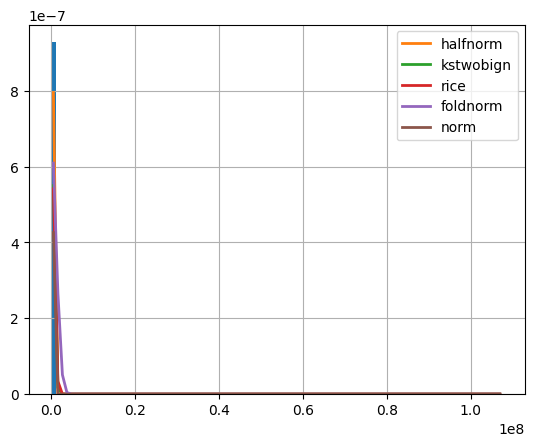

In [ ]:
# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice.csv")

f = Fitter(df["Price"], timeout =10000)
f.fit()
f.summary()

In [ ]:
f.get_best()
df = f.df_errors[f.df_errors['ks_pvalue'] ==0.0]
df.sort_values(by='ks_statistic', ascending=True)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
skewcauchy,8.582933e-13,5.723816e+03,5.756300e+03,inf,3.418163e-02,0.0
burr12,8.541085e-13,5.487309e+03,5.530621e+03,inf,3.437546e-02,0.0
alpha,8.580802e-13,5.713255e+03,5.745739e+03,inf,3.470241e-02,0.0
johnsonsu,8.587849e-13,6.763765e+03,6.807078e+03,inf,5.186992e-02,0.0
nct,8.559107e-13,5.600126e+03,5.643438e+03,inf,5.318071e-02,0.0
...,...,...,...,...,...,...
uniform,8.535131e-13,3.702441e+03,3.724097e+03,inf,9.890643e-01,0.0
gompertz,9.453635e-13,1.933140e+06,1.933172e+06,inf,9.999770e-01,0.0
gamma,8.621802e-13,inf,inf,NaN,1.000000e+00,0.0
norminvgauss,8.349515e-13,9.387957e+03,9.431269e+03,inf,9.575746e+01,0.0


In [ ]:
# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice.csv")

# fit the column "Price" to Rayleigh distribution
params = stats.skewcauchy.fit(df["Price"])
print(params)
# do the Kolmogorov-Smirnov test on the column "Price" and the best distribution
# sample the column "Price" to get the samples
samples = np.random.choice(df["Price"], 1000,replace=False)
D, p = stats.kstest(samples, "skewcauchy", args=params)
print("The D statistic is", D)
print("The p value is", p)

# (0.8703034366883041, 503.8840665546886, 541.7052936948382)
# The D statistic is 0.041526590384145634
# The p value is 0.06178781506717812

(0.8703034366883041, 503.8840665546886, 541.7052936948382)
The D statistic is 0.041526590384145634
The p value is 0.06178781506717812


In [ ]:
# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice.csv")

params = (0.8703034366883041, 503.8840665546886, 541.7052936948382)

# use Chi-Squqre to test the goodness of fit
# the observed frequency
observed = np.histogram(df["Price"], bins=10)[0]
# the expected frequency
expected = stats.skewcauchy.pdf(np.histogram(df["Price"], bins=10)[1], *params) * len(df)
# the degrees of freedom
df = len(observed) - 1
# the chi-square statistic
chi2 = np.sum((observed - expected) ** 2 / expected)
# the p value
p = 1 - stats.chi2.cdf(chi2, df)
print("The chi-square statistic is", chi2)
print("The p value is", p)


ValueError: operands could not be broadcast together with shapes (10,) (11,) 

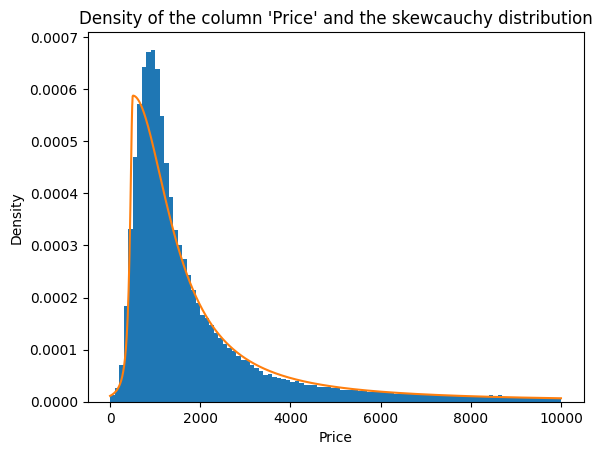

In [ ]:
D, p = stats.kstest(df["Price"], "skewcauchy", args=params)
# plot the density of the column "Price" in histogram and the skewcauchy distribution in the same plot
df["Price"].plot(kind='hist', bins=100, density=True,range = (0,10000))
x = np.linspace(0,10000, 1000)
y = stats.skewcauchy.pdf(x, *params)
plt.plot(x, y)
plt.title("Density of the column 'Price' and the skewcauchy distribution")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

In [ ]:
series,_ = stats.boxcox(df["Price"])
paras = stats.cauchy.fit(series)
print(paras)
# test the Kolmogorov-Smirnov test on the column "Price" and the best distribution
# sample the column "Price" to get the samples
samples = stats.cauchy.rvs(*paras, size=10000)
D, p = stats.kstest(series, "cauchy", args=paras)
print("The D statistic is", D)
print("The p value is", p)

(3.1352044125314205, 0.0708521412786216)
The D statistic is 0.08455428483359284
The p value is 0.0


In [ ]:
# generate 10000000 random samples from skewcauchy distribution
samples = stats.skewcauchy.rvs(*params, size=100000000)

# do the Kolmogorov-Smirnov test on the samples and the skewcauchy distribution
D, p = stats.kstest(samples, "skewcauchy", args=params)
print("The D statistic is", D)
print("The p value is", p)

The D statistic is 9.047406538287284e-05
The p value is 0.3861957448519332


### Guess the distribution

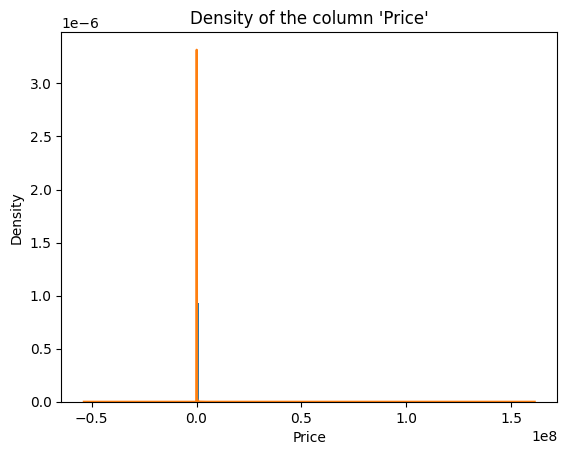

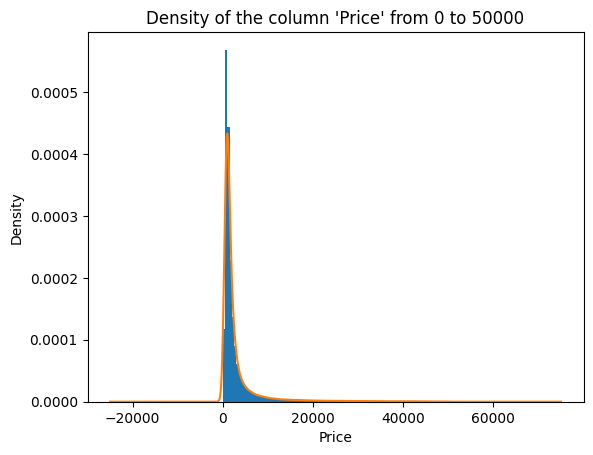

s is 1.3176491314451786 loc is -0.013064612961913477 scale is 1914.073168510721
The log normal statistic is 0.1422616539996132
The log normal p-value is 0.0
loc is 7.556975964808741 scale is 1.3176664685049733
The K-S statistic is 0.14226014806154252
The K-S p-value is 0.0


In [ ]:
# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice.csv")

# get the distribution of the original "Price" column with both histogram and kernel density estimation
df["Price"].plot(kind='hist', bins=100, density=True)
df["Price"].plot(kind='kde')
plt.title("Density of the column 'Price'")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

# get the distribution of the original "Price" column with both histogram and kernel density estimation from 0 to 50000
df_0_50000= df[df["Price"] <= 50000]
df_0_50000["Price"].plot(kind='hist', bins=100, density=True)
df_0_50000["Price"].plot(kind='kde')
plt.title("Density of the column 'Price' from 0 to 50000")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

# # get the Q-Q plot of the "Price" column
# stats.probplot(df["Price"], dist="expon", plot=plt)
# plt.title("Q-Q plot of the column 'Price'")
# plt.xlabel("Theoretical quantiles")
# plt.ylabel("Sample quantiles")
# plt.show()

# # get the K-S test of the "Price" column
# a, loc, scale = stats.gamma.fit(df["Price"])
# ks_statistic, ks_p_value = stats.kstest(df["Price"], 'gamma', args=(a, loc, scale))
# print("a is", a, "loc is", loc, "scale is", scale)
# print("The K-S statistic is", ks_statistic)
# print("The K-S p-value is", ks_p_value)

# # test the whether the "Price" column follows the expnormal distribution
# a, loc, scale = stats.exponnorm.fit(df["Price"])
# exponnorm_statistic, exponnorm_p_value = stats.kstest(df["Price"], 'exponnorm', args=(a, loc, scale),method='approx')
# print("a is", a, "loc is", loc, "scale is", scale)
# print("The expnormal statistic is", exponnorm_statistic)
# print("The expnormal p-value is", exponnorm_p_value)

# # test the whether the "Price" column follows the log gamma distribution
# a, loc, scale = stats.loggamma.fit(df["Price"])
# loggamma_statistic, loggamma_p_value = stats.kstest(df["Price"], 'loggamma', args=(a, loc, scale),method='approx')
# print("a is", a, "loc is", loc, "scale is", scale)
# print("The log gamma statistic is", loggamma_statistic)
# print("The log gamma p-value is", loggamma_p_value)

# test the whether the "Price" column follows the log normal distribution
s, loc, scale = stats.lognorm.fit(df["Price"])
lognorm_statistic, lognorm_p_value = stats.kstest(df["Price"], 'lognorm', args=(s, loc, scale),method='approx')
print("s is", s, "loc is", loc, "scale is", scale)
print("The log normal statistic is", lognorm_statistic)
print("The log normal p-value is", lognorm_p_value)

# take the log transformation of the "Price" column in the new column "log_Price"
df["log_Price"] = np.log(df["Price"])

# save the data to the csv file
df.to_csv("processedData_duringAnalysis/withLogPrice.csv", index=False)

# get the K-S test of the "log_Price" column
loc, scale = stats.norm.fit(df["log_Price"])
ks_statistic, ks_p_value = stats.kstest(df["log_Price"], 'norm', args=(loc, scale))
print("loc is", loc, "scale is", scale)
print("The K-S statistic is", ks_statistic)
print("The K-S p-value is", ks_p_value)

### to normal distribution by box-cox

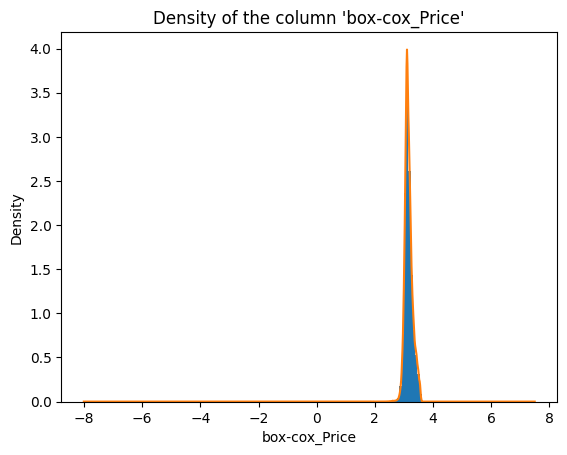

loc is 3.161138401177929 scale is 0.1387479380039696
The K-S statistic is 0.06852621292616035
The K-S p-value is 0.0
The Shapiro-Wilk statistic is 0.9706422090530396
The Shapiro-Wilk p-value is 0.7683787941932678


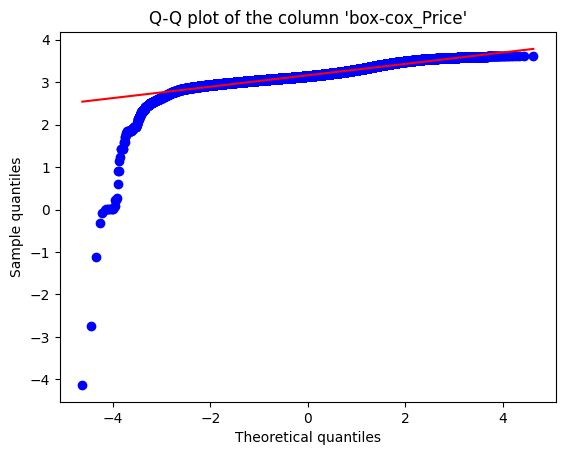

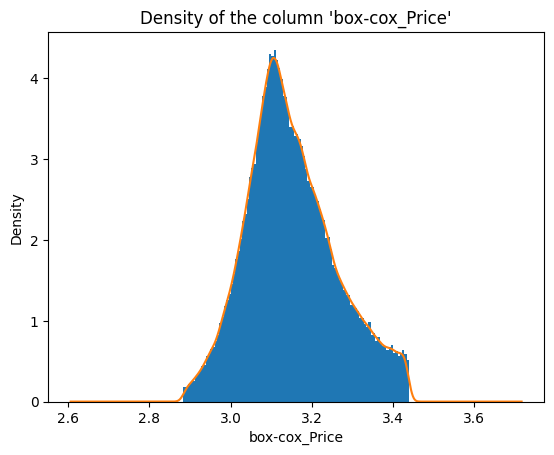

loc is 3.1499932592437663 scale is 0.11049893879438773
The K-S statistic is 0.0505377145818342
The K-S p-value is 0.0


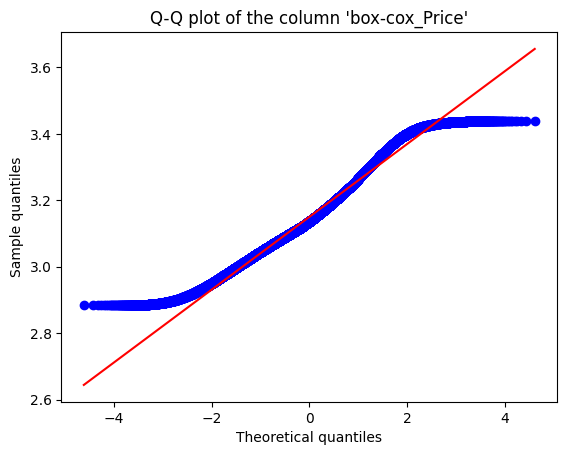

In [ ]:
# load the data from the csv file
df = pd.read_csv("processedData_duringAnalysis\withLogPrice.csv")
# take the box-cox transformation of the "Price" column in the new column "box-cox_Price"
df["box-cox_Price"], lambdaForPrice = stats.boxcox(df["Price"])

# plot the density of the column "box-cox_Price" in histogram and in kernel density estimation in the same plot
df["box-cox_Price"].plot(kind='hist', bins=100, density=True)
df["box-cox_Price"].plot(kind='kde')
plt.title("Density of the column 'box-cox_Price'")
plt.xlabel("box-cox_Price")
plt.ylabel("Density")
plt.show()

# get the K-S test of the "box-cox_Price" column
loc, scale = stats.norm.fit(df["box-cox_Price"])
ks_statistic, ks_p_value = stats.kstest(df["box-cox_Price"], 'norm', args=(loc, scale))
print("loc is", loc, "scale is", scale)
print("The K-S statistic is", ks_statistic)
print("The K-S p-value is", ks_p_value)

# # prove the "box-cox_Price" column follows the normal distribution by likelihood ratio test
# log_likelihood_box_cox = stats.norm.logpdf(df["box-cox_Price"], loc=loc, scale=scale).sum()
# log_likelihood_original = stats.norm.logpdf(df["Price"], loc=loc, scale=scale).sum()
# print("The log likelihood of the 'box-cox_Price' column is", log_likelihood_box_cox)
# print("The log likelihood of the 'Price' column is", log_likelihood_original)
# print("The likelihood ratio test is", 2 * (log_likelihood_box_cox - log_likelihood_original))

# use Shapiro-Wilk test to test the normality of the "box-cox_Price" column
# sample the original data
sample = np.random.choice(df["box-cox_Price"], 20,replace=True)
shapiro_statistic, shapiro_p_value = stats.shapiro(sample)
print("The Shapiro-Wilk statistic is", shapiro_statistic)
print("The Shapiro-Wilk p-value is", shapiro_p_value)

# plot the Q-Q plot of the "box-cox_Price" column
stats.probplot(df["box-cox_Price"], dist="norm", plot=plt)
plt.title("Q-Q plot of the column 'box-cox_Price'")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

# # fit the column "box-cox_Price" to the normal distribution
# loc, scale = stats.norm.fit(df["box-cox_Price"])
# # get the kullback-leibler divergence of the "box-cox_Price" column to the normal distribution
# kl_divergence = stats.entropy(df["box-cox_Price"], stats.norm.pdf(df["box-cox_Price"], loc=loc, scale=scale))
# # fit the column "Price" to the normal distribution
# loc, scale = stats.norm.fit(df["Price"])
# # get the kullback-leibler divergence of the "Price" column to the normal distribution
# kl_divergence_original = stats.entropy(df["Price"], stats.norm.pdf(df["Price"], loc=loc, scale=scale))
# print("The kullback-leibler divergence of the 'box-cox_Price' column to the normal distribution is", kl_divergence)
# print("The kullback-leibler divergence of the 'Price' column to the normal distribution is", kl_divergence_original)

# remove the outliers in the "box-cox_Price" column
z = np.abs(stats.zscore(df["box-cox_Price"]))
# save the removed rows to a csv file
df[z >= 2].reset_index(drop=True).to_csv("log/removedRows_byPrice_boxCox_Z2.csv", index=False)
# remove the outliers 
df = df[z < 2]
# save the data to the csv file
df.to_csv("processedData_duringAnalysis/filtered_byPrice_boxCox_Z2.csv", index=False)

# plot the density of the column "box-cox_Price" in histogram and in kernel density estimation in the same plot
df["box-cox_Price"].plot(kind='hist', bins=100, density=True)
df["box-cox_Price"].plot(kind='kde')
plt.title("Density of the column 'box-cox_Price'")
plt.xlabel("box-cox_Price")
plt.ylabel("Density")
plt.show()

# get the K-S test of the "box-cox_Price" column
loc, scale = stats.norm.fit(df["box-cox_Price"])
ks_statistic, ks_p_value = stats.kstest(df["box-cox_Price"], 'norm', args=(loc, scale))
print("loc is", loc, "scale is", scale)
print("The K-S statistic is", ks_statistic)
print("The K-S p-value is", ks_p_value)

# plot the Q-Q plot of the "box-cox_Price" column
stats.probplot(df["box-cox_Price"], dist="norm", plot=plt)
plt.title("Q-Q plot of the column 'box-cox_Price'")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()


### to normal distribution by lognorm

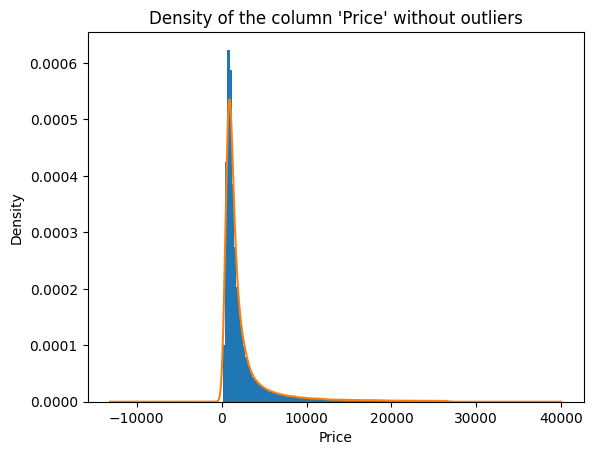

loc is 7.339535474560678 scale is 0.8841581429363914
The K-S statistic is 0.08600280309246333
The K-S p-value is 0.0


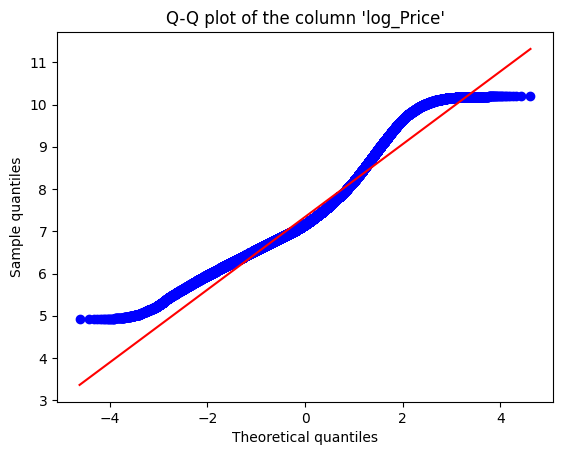

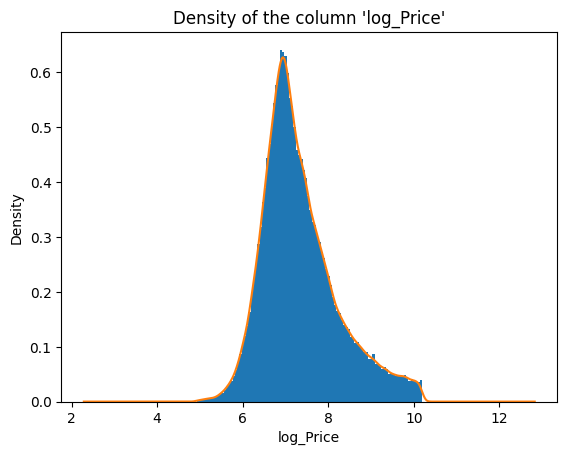

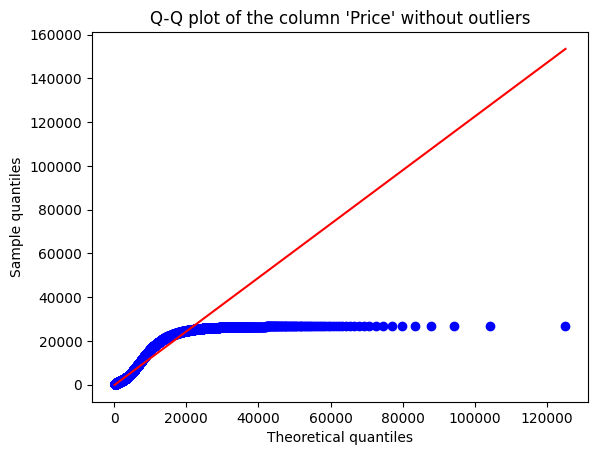

In [ ]:
# load the data from the csv file
df = pd.read_csv("processedData_duringAnalysis\withLogPrice.csv")

# remove the outliers in the "log_Price" column
z = np.abs(stats.zscore(df["log_Price"]))
# save the removed rows to a csv file
df[z >= 2].to_csv("log/removedRows_byPrice_LogNormDistribution_Z2.csv")
# remove the outliers in the "log_Price" column
df = df[z < 2]# remove the outliers and reset the index
# save the data to a csv file
df.to_csv("processedData_duringAnalysis/filtered_byPrice_LogNormDistribution_Z2.csv", index=False)

# plot the density of the "Price" column without outliers with both histogram and kernel density estimation
df["Price"].plot(kind='hist', bins=100, density=True)
df["Price"].plot(kind='kde')
plt.title("Density of the column 'Price' without outliers")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

# again, get the K-S test of the "Price" column without outliers
loc, scale = stats.norm.fit(df["log_Price"])
ks_statistic, ks_p_value = stats.kstest(df["log_Price"], 'norm', args=(loc, scale))
print("loc is", loc, "scale is", scale)
print("The K-S statistic is", ks_statistic)
print("The K-S p-value is", ks_p_value)

# plot the Q-Q plot of the "log_Price" column
stats.probplot(df["log_Price"], dist="norm", plot=plt)
plt.title("Q-Q plot of the column 'log_Price'")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

# plot the density of the "Price" column without outliers with both histogram and kernel density estimation
df["log_Price"].plot(kind='hist', bins=100, density=True)
df["log_Price"].plot(kind='kde')
plt.title("Density of the column 'log_Price'")
plt.xlabel("log_Price")
plt.ylabel("Density")
plt.show()

# get the K-S test of the "Price" column without outliers
s, loc, scale = stats.lognorm.fit(df["Price"])
# plot the Q-Q plot of the "Price" column without outliers
stats.probplot(df["Price"], dist="lognorm", sparams=(s, loc, scale), plot=plt) # lognorm distribution
plt.title("Q-Q plot of the column 'Price' without outliers")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

In [ ]:
# load the data from the csv file
df = pd.read_csv("log/removedRows_byPrice_LogNormDistribution_Z2.csv")

# calculate the average price
averagePrice = df["Price"].mean()
print("The average price is", averagePrice)

The average price is 324913.765629833


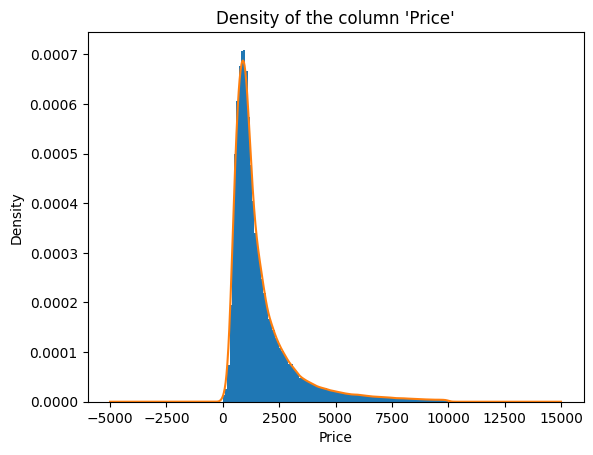

In [ ]:
# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice_filtered.csv")

# get the distribution of the original "Price" column with both histogram and kernel density estimation
df["Price"].plot(kind='hist', bins=100, density=True)
df["Price"].plot(kind='kde')
plt.title("Density of the column 'Price'")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

## get the major export countries

The K-S statistic is 0.019034112670345826
The K-S p-value is 0.8547733408588034
